In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as sp
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

## 1. Basic Analysis and understanding the data

In [2]:
#load the dataset
df = pd.read_csv(r"D:\DSML class\Data\Jamboree_Admission.csv")

### Observation of the data

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [5]:
#Geting the overview of the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
#Uninique values and it's count unique for all columns
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

### Data Processing

In [7]:
# Duplicate value check
df[df.duplicated()]

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


In [8]:
#Check missing values
print('Missing Values:')
df.isnull().sum()

Missing Values:


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

### Droping the row identifier

In [9]:
# Sl.No. is the row identifier and it's being dropped as it will interfere in the model's performance
df.drop('Serial No.', axis=1, inplace=True)

### Non graphical and graphical analysis of the variable

#### Nongraphical Analysis

In [10]:
#summary of statistics of numerical columns
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#### Graphical analysis

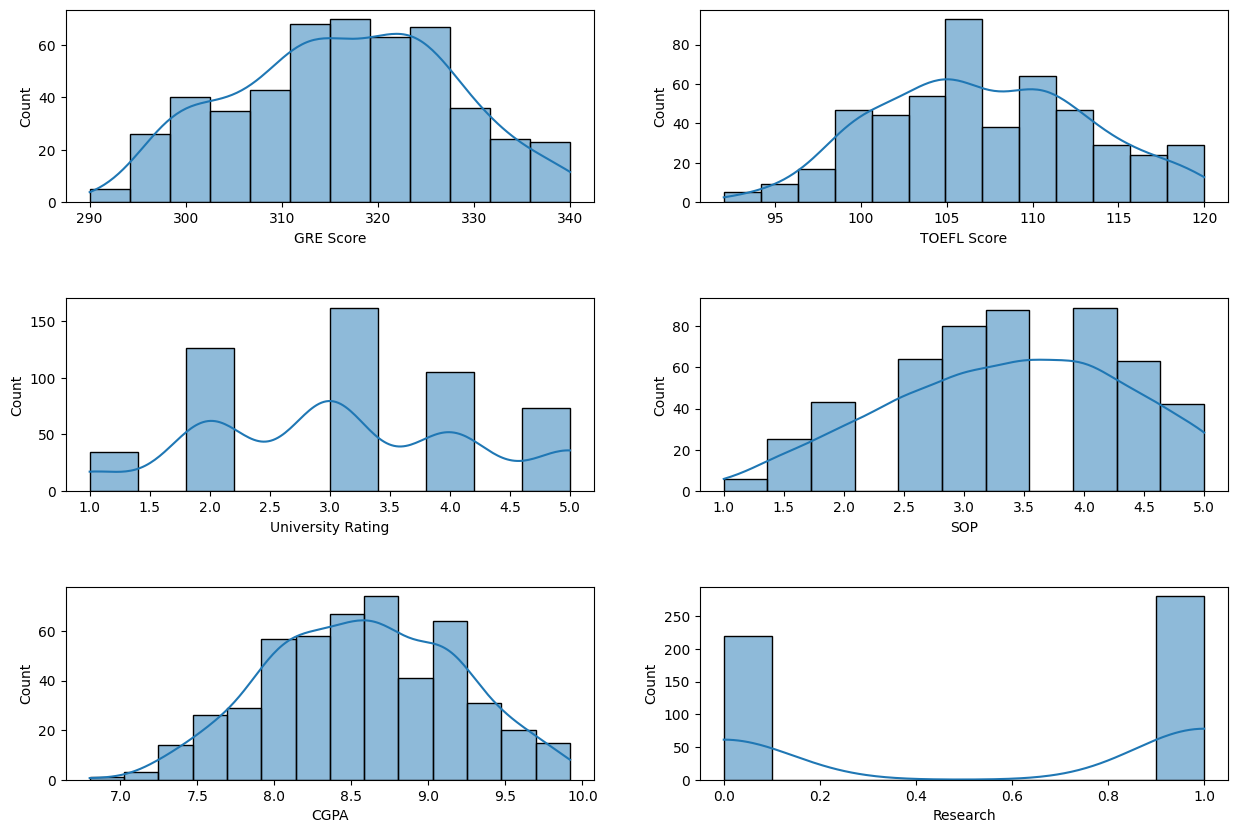

In [11]:
#Plotting the distribution chart for the numercal varaibles

plt.figure(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(3,2,1)
sns.histplot(df['GRE Score'], kde=True)

plt.subplot(3,2,2)
sns.histplot(df['TOEFL Score'], kde=True)

plt.subplot(3,2,3)
sns.histplot(df['University Rating'], kde=True)

plt.subplot(3,2,4)
sns.histplot(df['SOP'], kde=True)

plt.subplot(3,2,5)
sns.histplot(df['CGPA'], kde=True)

plt.subplot(3,2,6)
sns.histplot(data=df, x='Research', kde=True)

plt.show()

### To understand the relationship between different variables responsbile for student admission we perform corelation analysis

In [12]:
corr_mat = df.corr()

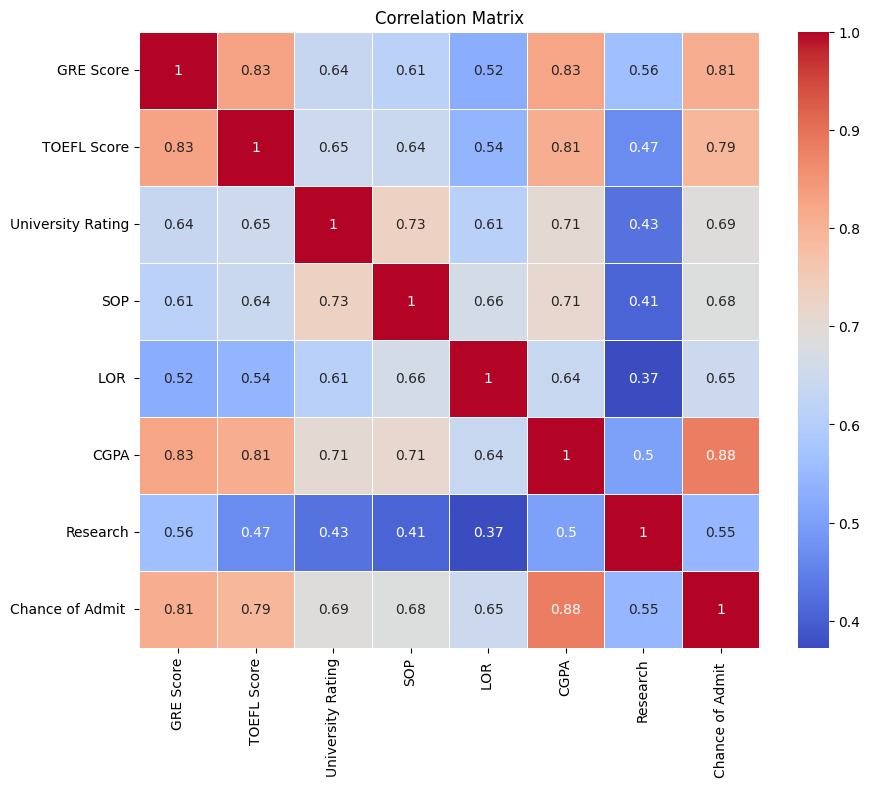

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, linewidths=0.5, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Checking the correlation between the independent variables

In [14]:
#Removing the Target variable chance of admit
df_independent = df.drop('Chance of Admit ', axis=1)

In [15]:
independent_corr_mat = df_independent.corr()

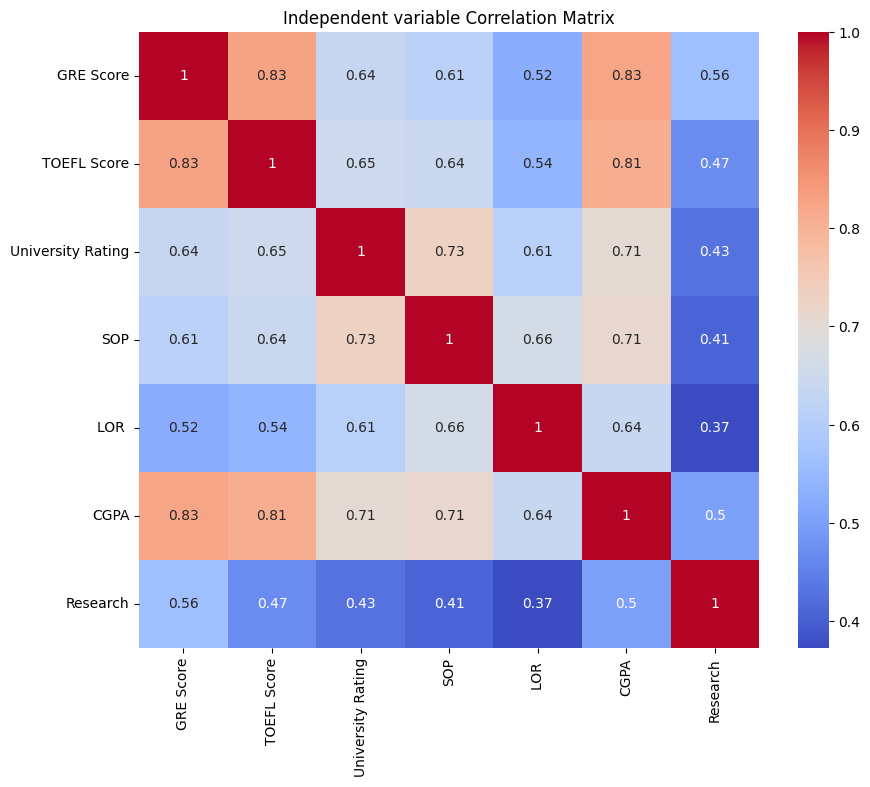

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(independent_corr_mat, annot=True, cmap='coolwarm')
plt.title('Independent variable Correlation Matrix')
plt.show()

## Linear Regression using Statsmodel Library

In [17]:
#Defining independent variables(Features) and dependent variable(Target)
X = df.drop('Chance of Admit ', axis=1)
y = df['Chance of Admit ']

In [18]:
#Adding constant to independent variable whci is required for stasmodel
X = sm.add_constant(X)

In [19]:
# Fit the linear regression model
model = sm.OLS(y, X).fit()

In [20]:
#Summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.4
Date:                Mon, 19 Feb 2024   Prob (F-statistic):          8.21e-180
Time:                        21:31:18   Log-Likelihood:                 701.38
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2757      0.10

## Insights

### 1. R^2 and Adjusted R^2:

- R^2: R-squared is 0.822 indicating 82.2% of the variability of dependent variable, Chance of Admit is explained by the independednt variable in the model.
- Adjusted R^2: Adjusted R-squared is 0.819 which is slightly lesser than the R-squared, indicating that the additional predictors do not significantly contribute to the explanatory poer of the model.

### 2. Coeffcients:

- Constant(Intercept): It's -1.2757 which represents the value of the dependent variable when all the independent variables are zero.
- GRE, TOEFL, LOR, CGPA and Research coefficents are all positive and the pValue is greater than 0.05 which shows that these variables are statistically sigificant and are associated with the increase in probablity of admission.
- University rating and SOP coefficients are positive but are not statistically significant as pValue is higher than 0.05 which shows that these variables do not have significant impact on the probablity of admission.


## Assumptions of Linear Regression

### Multicolinearity check by VIF score

In [21]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Features,VIF
0,const,1511.495830
1,GRE Score,4.464249
2,TOEFL Score,3.904213
3,University Rating,2.621036
4,SOP,2.835210
5,LOR,2.033555
6,CGPA,4.777992
7,Research,1.494008


In [22]:
vif = vif.drop(0)
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(1, X.shape[1])]
vif

,Features,VIF
1,GRE Score,4.464249
2,TOEFL Score,3.904213
3,University Rating,2.621036
4,SOP,2.835210
5,LOR,2.033555
6,CGPA,4.777992
7,Research,1.494008


## Insights
- Based on the VIF values which are below 5 is generally acceptable which indicates minimal multicolinearity issues.

### Mean of residuals

In [23]:
residuals = model.resid
mean_of_residuals = np.mean(residuals)
print('Mean of Residuals:', mean_of_residuals)

Mean of Residuals: 4.0534242629064463e-16


## Insights
- The mean of residual is 4.0534242629064463e-16 which means that the residuals is centered around zero which means that the residual errors are evenly distributed above and below the regression line. 

### Linearity of variables

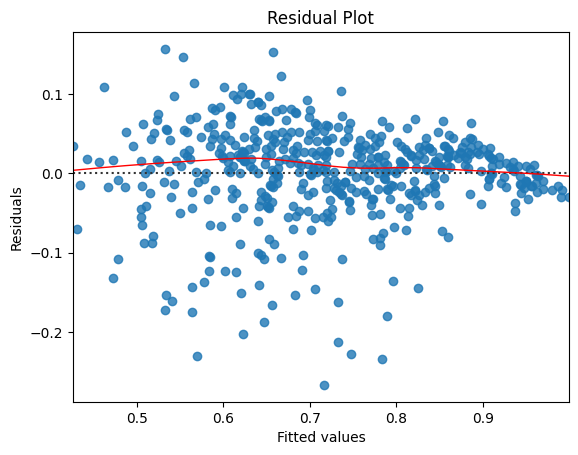

In [24]:
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

### Test for Homoscedasticity

In [25]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X)
print('F ststistic:', test[0])
print('p-value:', test[1])

F ststistic: 0.4494044330462436
p-value: 0.9999999995739839


## Insights

- The p-value is 1 and hence we fail to reject the null hypothesis of Homoscedasticity test which is the varicance of the residuals is constant across oservations.

### Normality of Residuals (Q-Q Plot)

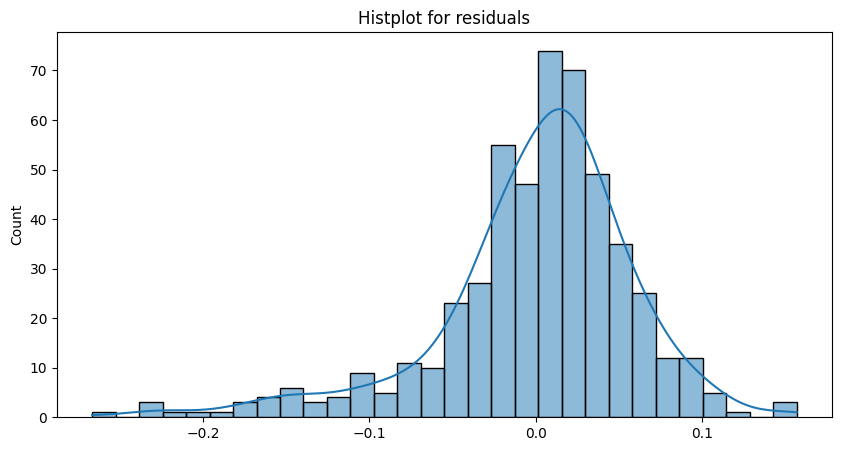

In [26]:
# plotting the histogram of residuals
plt.figure(figsize=(10,5))
sns.histplot(x=residuals, kde=True)
plt.title('Histplot for residuals')
plt.show()

0.9240807700700094

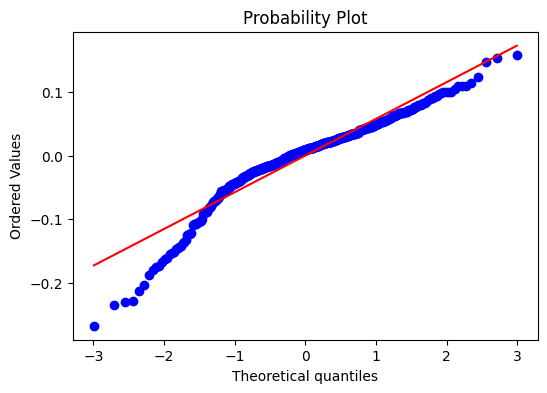

In [27]:
# plotting the QQ plot fot the residuals
fig, ax = plt.subplots(figsize=(6,4))
_, (__, ___, r) = sp.probplot(residuals, plot=ax, fit=True)
r**2

## Insights

- The high R2 score of approximately 0.92 which is close to 1 suggests that the residuals exhibit a high degree of normality supporting the normality assumption of the linear regression model.
- The histplot of the residuals also supports the normality of the linear regression model.

## Model Evaluation

In [28]:
# Predicting the target variable
y_pred = model.predict(X)

# Model evaluation metrics
mae = mean_absolute_error(y, y_pred)
rmse = mean_squared_error(y, y_pred, squared=False)
r2 = r2_score(y, y_pred)

n = len(y)
d = X.shape[1]

adjusted_r2 = 1 - (1-r2)*(n-1)/(n-d-1)

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared Score:", r2)
print("Adjusted R-squared Score:", adjusted_r2)

Mean Absolute Error (MAE): 0.042572390149733436
Root Mean Squared Error (RMSE): 0.05950420877764953
R-squared Score: 0.8219007395178417
Adjusted R-squared Score: 0.8189989185731222


## Insights

### Mean Absolute error:
- The mean absolute error is 0.0426 which shows that the model's predictions are off by approximately 0.0426 units from the actaul values

### Root mean squared error:
- RMSE is the measure of the spred of the residuals around the resgression line and the average magnitude of the residuals is approximately 0.0595 units.

### R-squared score:
- The R2 score is approximately 0.8219 which indicates that approximately 82.19% of the variability in the dependent variable is explained by the independent variable in the model.

### Adjusted R-squared score:
- The adjusted R-squared score, which accounts for the number of predictors in the model, is approximately 0.8190. It is slightly lower than the R-squared score but still indicates a good fit of the model.

## Lasso and Ridge regression using sklearn

In [29]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Lasso Regression

In [30]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)

### Ridge regression

In [31]:
ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)

In [32]:
# Model evaluation
def evaluate_model(yactual, ypred):
    mae = mean_absolute_error(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)
    r2 = r2_score(y, y_pred)
    return mae, rmse, r2

In [34]:
lasso_metrics = evaluate_model(y_test, lasso_y_pred)
ridge_metrics = evaluate_model(y_test, ridge_y_pred)

print("Lasso Regression Metrics:")
print("Mean Absolute Error (MAE):", lasso_metrics[0])
print("Root Mean Squared Error (RMSE):", lasso_metrics[1])
print("R-squared Score:", lasso_metrics[2])

print("Ridge Regression Metrics:")
print("Mean Absolute Error (MAE):", ridge_metrics[0])
print("Root Mean Squared Error (RMSE):", ridge_metrics[1])
print("R-squared Score:", ridge_metrics[2])

Lasso Regression Metrics:
Mean Absolute Error (MAE): 0.042572390149733436
Root Mean Squared Error (RMSE): 0.05950420877764953
R-squared Score: 0.8219007395178417

Ridge Regression Metrics:
Mean Absolute Error (MAE): 0.042572390149733436
Root Mean Squared Error (RMSE): 0.05950420877764953
R-squared Score: 0.8219007395178417


## Insights
- Lasso and Ridge regression models has produced identical results and the metrics suggest thatboth Lasso and Ridge regression models perform similarly with no noticeable improvement over the standard linear regression model.

# Actionable insights and recommendations

Based on the analysis conducted on the dataset and the performance of various regression models, here are some actionable insights and recommendations:

- The features such as GRE Score, TOEFL Score, CGPA, LOR, and Research experience showed significant impact on the chance of admission.
- Prioritize and focus on improving features that have a significant positive impact on the chance of admission.
- Students aiming for top colleges abroad should aim to improve their performance in these areas.
- While the Statement of Purpose (SOP) and Letter of Recommendation (LOR) were included in the model, they did not show significant impact on the chance of admission in the analysis. However, it's important to note that these components are still crucial in the application process and can provide valuable insights into a candidate's character and potential.
- Candidates with research experience tend to have a slightly higher chance of admission according to the model. Encouraging students to participate in research opportunities during their undergraduate studies could enhance their profiles.
- Providing students with resources and support to improve their profiles for admissions to top colleges abroad. This could include test preparation assistance for exams like GRE and TOEFL, guidance on crafting strong personal statements and recommendation letters, and opportunities for research experience.

By implementing these insights and recommendations, Jamboree can further enhance its support for students aiming to secure admission to Ivy League colleges and other top universities abroad.